In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import io
%cd "G:\PGW23\python\Traffic data"

G:\PGW23\python\Traffic data


In [3]:
traffic=pd.read_csv("trafficData158324.csv")

In [4]:
traffic.head()

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,66,56,668,66,2014-02-13T11:30:00,7,190000,158324
1,OK,69,53,668,69,2014-02-13T11:35:00,5,190449,158324
2,OK,69,53,668,69,2014-02-13T11:40:00,6,190898,158324
3,OK,70,52,668,70,2014-02-13T11:45:00,3,191347,158324
4,OK,64,57,668,64,2014-02-13T11:50:00,6,191796,158324


In [5]:
#univariant time series

trafficunivar=traffic[['TIMESTAMP','vehicleCount']]

In [6]:
trafficunivar.head()

,TIMESTAMP,vehicleCount
0,2014-02-13T11:30:00,7
1,2014-02-13T11:35:00,5
2,2014-02-13T11:40:00,6
3,2014-02-13T11:45:00,3
4,2014-02-13T11:50:00,6


In [7]:
trafficunivar.dtypes

TIMESTAMP       object
vehicleCount     int64
dtype: object

In [8]:
trafficunivar.TIMESTAMP=pd.to_datetime(trafficunivar.TIMESTAMP,errors="coerce")

C:\Users\RELIANCE\AppData\Local\Temp\ipykernel_2876\1923988035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafficunivar.TIMESTAMP=pd.to_datetime(trafficunivar.TIMESTAMP,errors="coerce")


In [9]:
trafficunivar.dtypes

TIMESTAMP       datetime64[ns]
vehicleCount             int64
dtype: object

<AxesSubplot:>

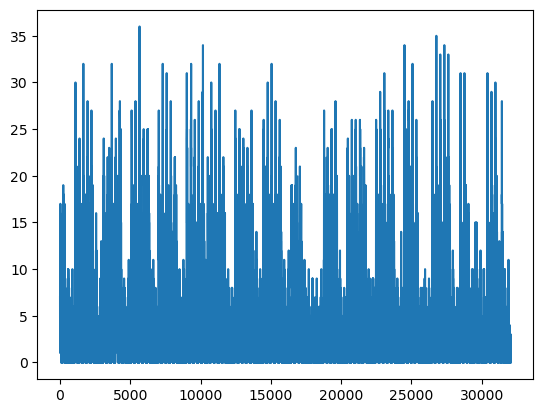

In [10]:
trafficunivar.vehicleCount.plot(kind='line')

In [11]:
#convert 5 min time interval to a diff time interval like hour
hourlytraffic=trafficunivar.resample("60Min",on='TIMESTAMP').sum()

In [12]:
hourlytraffic.head()

,vehicleCount
TIMESTAMP,
2014-02-13 11:00:00,36
2014-02-13 12:00:00,124
2014-02-13 13:00:00,92
2014-02-13 14:00:00,110
2014-02-13 15:00:00,91


In [13]:
dailytraffic=trafficunivar.resample("d",on='TIMESTAMP').sum()

In [14]:
monthlytraffic=trafficunivar.resample("m",on='TIMESTAMP').sum()

<AxesSubplot:xlabel='TIMESTAMP'>

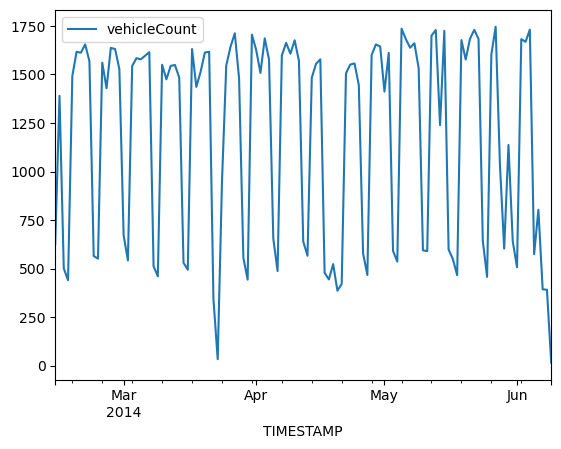

In [15]:
dailytraffic.plot(kind='line')

In [16]:
traffic.head()

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,66,56,668,66,2014-02-13T11:30:00,7,190000,158324
1,OK,69,53,668,69,2014-02-13T11:35:00,5,190449,158324
2,OK,69,53,668,69,2014-02-13T11:40:00,6,190898,158324
3,OK,70,52,668,70,2014-02-13T11:45:00,3,191347,158324
4,OK,64,57,668,64,2014-02-13T11:50:00,6,191796,158324


In [17]:
trafficdata1=traffic[['avgMeasuredTime','avgSpeed','medianMeasuredTime','TIMESTAMP','vehicleCount']]

In [18]:
trafficdata1

,avgMeasuredTime,avgSpeed,medianMeasuredTime,TIMESTAMP,vehicleCount
0,66,56,66,2014-02-13T11:30:00,7
1,69,53,69,2014-02-13T11:35:00,5
2,69,53,69,2014-02-13T11:40:00,6
3,70,52,70,2014-02-13T11:45:00,3
4,64,57,64,2014-02-13T11:50:00,6
...,...,...,...,...,...
32070,56,66,56,2014-06-09T05:10:00,1
32071,53,69,53,2014-06-09T05:15:00,1
32072,53,69,53,2014-06-09T05:20:00,1
32073,53,69,53,2014-06-09T05:25:00,0


In [19]:
trafficdata1.TIMESTAMP=pd.to_datetime(trafficdata1.TIMESTAMP,errors="coerce")

C:\Users\RELIANCE\AppData\Local\Temp\ipykernel_2876\3371339167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafficdata1.TIMESTAMP=pd.to_datetime(trafficdata1.TIMESTAMP,errors="coerce")


In [20]:
trafficdata1.dtypes

avgMeasuredTime                int64
avgSpeed                       int64
medianMeasuredTime             int64
TIMESTAMP             datetime64[ns]
vehicleCount                   int64
dtype: object

In [21]:
dailytraffic=trafficdata1.resample('d',on='TIMESTAMP').sum()

In [22]:
dailytraffic.head()

,avgMeasuredTime,avgSpeed,medianMeasuredTime,vehicleCount
TIMESTAMP,,,,
2014-02-13,9199,9137,9199,625
2014-02-14,17639,17843,17639,1390
2014-02-15,16926,18684,16926,501
2014-02-16,16132,19081,16132,440
2014-02-17,19178,17380,19178,1492


In [23]:
dailytraffic.corr()

,avgMeasuredTime,avgSpeed,medianMeasuredTime,vehicleCount
avgMeasuredTime,1.000000,0.724728,1.000000,0.665092
avgSpeed,0.724728,1.000000,0.724728,0.084955
medianMeasuredTime,1.000000,0.724728,1.000000,0.665092
vehicleCount,0.665092,0.084955,0.665092,1.000000


In [24]:
dailytraffic=dailytraffic.drop("medianMeasuredTime",axis=1)

In [25]:
dailytraffic.head()

,avgMeasuredTime,avgSpeed,vehicleCount
TIMESTAMP,,,
2014-02-13,9199,9137,625
2014-02-14,17639,17843,1390
2014-02-15,16926,18684,501
2014-02-16,16132,19081,440
2014-02-17,19178,17380,1492


In [26]:
dailytraffic=dailytraffic.reset_index()

In [27]:
#extract  variable from timesatmp

dailytraffic['weekday']=dailytraffic.TIMESTAMP.dt.weekday

In [28]:
dailytraffic.weekday.value_counts()

3    17
4    17
5    17
6    17
0    17
1    16
2    16
Name: weekday, dtype: int64

In [29]:
dailytraffic['month']=dailytraffic.TIMESTAMP.dt.month

In [30]:
dailytraffic.month.value_counts()

3    31
5    31
4    30
2    16
6     9
Name: month, dtype: int64

In [31]:
dailytraffic=pd.get_dummies(dailytraffic,columns=['weekday','month'])

In [32]:
dailytraffic.head()

,TIMESTAMP,avgMeasuredTime,avgSpeed,vehicleCount,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_2,month_3,month_4,month_5,month_6
0,2014-02-13,9199,9137,625,0,0,0,1,0,0,0,1,0,0,0,0
1,2014-02-14,17639,17843,1390,0,0,0,0,1,0,0,1,0,0,0,0
2,2014-02-15,16926,18684,501,0,0,0,0,0,1,0,1,0,0,0,0
3,2014-02-16,16132,19081,440,0,0,0,0,0,0,1,1,0,0,0,0
4,2014-02-17,19178,17380,1492,1,0,0,0,0,0,0,1,0,0,0,0


In [33]:
dailytraffic=dailytraffic.drop('TIMESTAMP',axis=1)

In [34]:
y=dailytraffic.vehicleCount

In [35]:
X=dailytraffic.drop('vehicleCount',axis=1)

<AxesSubplot:ylabel='Frequency'>

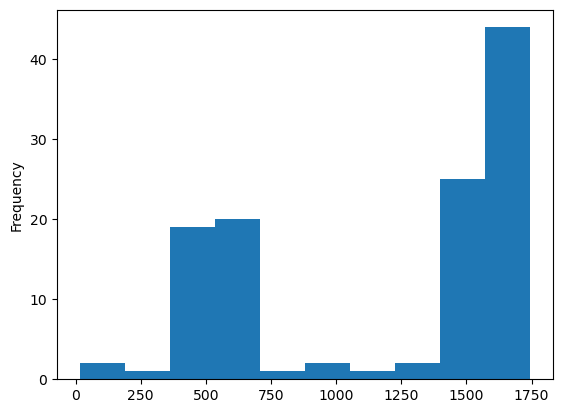

In [36]:
y.plot(kind='hist')

<AxesSubplot:>

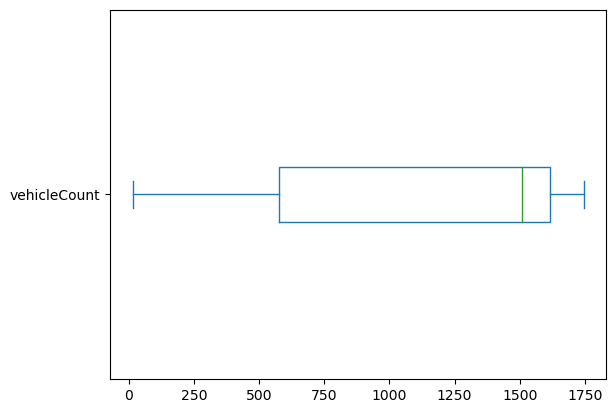

In [37]:
y.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

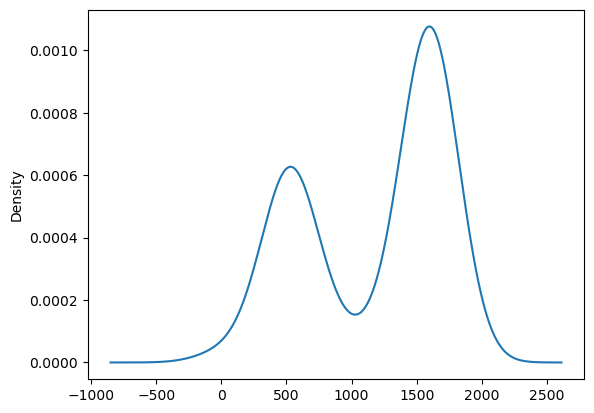

In [38]:
y.plot(kind='density')

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg=LinearRegression()

In [41]:
regmodel=reg.fit(X,y)

In [42]:
regmodel.score(X,y)

0.8653860930884923

In [43]:
regpredict=regmodel.predict(X)

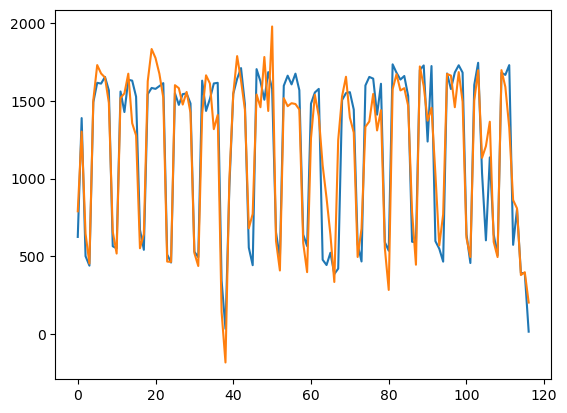

In [44]:
plt.plot(y)
plt.plot(regpredict)
plt.show()

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
tree=DecisionTreeRegressor(max_depth=10)

In [47]:
treemodel=tree.fit(X,y)

In [48]:
treemodel.score(X,y)

0.9985828238957398

In [49]:
treepredict=treemodel.predict(X)

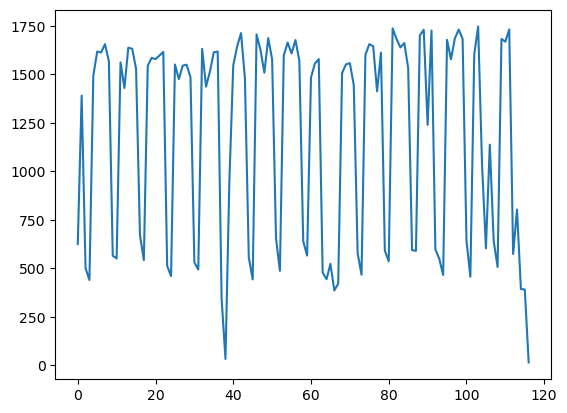

In [50]:
plt.plot(y)

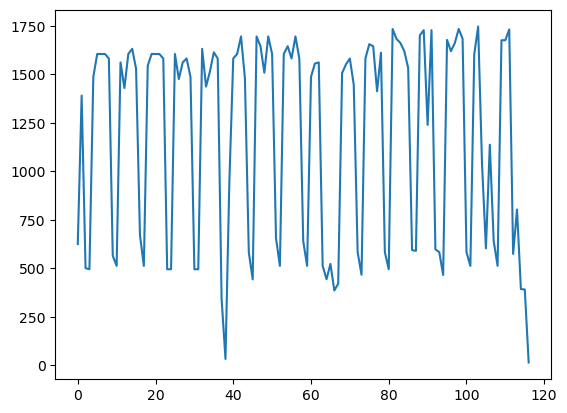

In [51]:
plt.plot(treepredict)